### فلاتر زيادة الحدة (Sharpening)

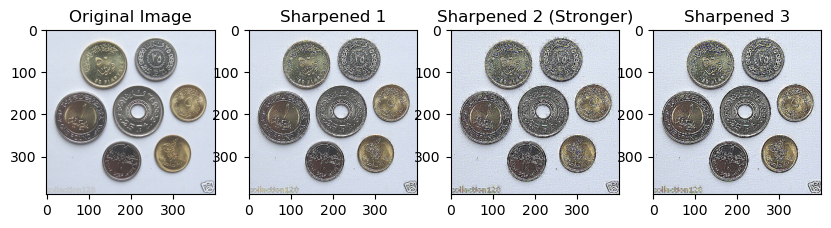

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# اقرأ الصورة
image = cv2.imread('images/coins.jpg')

# --- تعريف ثلاثة أقنعة مختلفة لزيادة الحدة ---
# القيمة في المنتصف تحدد مدى قوة التأثير
mask1 = np.array([
    [0, -1, 0],
    [-1, 5, -1],
    [0, -1, 0]
])

mask2 = np.array([
    [-1, -1, -1],
    [-1, 9, -1],
    [-1, -1, -1]
])

mask3 = np.array([
    [-2, 1, -2],
    [1, 5, 1],
    [-2, 1, -2]
])

# طبق كل قناع على الصورة الأصلية باستخدام دالة filter2D
sharpened_image1 = cv2.filter2D(src=image, ddepth=-1, kernel=mask1)
sharpened_image2 = cv2.filter2D(src=image, ddepth=-1, kernel=mask2)
sharpened_image3 = cv2.filter2D(src=image, ddepth=-1, kernel=mask3)

# --- كود العرض للمقارنة ---
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
sharpened_image1 = cv2.cvtColor(sharpened_image1, cv2.COLOR_BGR2RGB)
sharpened_image2 = cv2.cvtColor(sharpened_image2, cv2.COLOR_BGR2RGB)
sharpened_image3 = cv2.cvtColor(sharpened_image3, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 4, figsize=(10, 4))
axs[0].imshow(image)
axs[0].set_title('Original Image')
axs[1].imshow(sharpened_image1)
axs[1].set_title('Sharpened 1')
axs[2].imshow(sharpened_image2)
axs[2].set_title('Sharpened 2 (Stronger)')
axs[3].imshow(sharpened_image3)
axs[3].set_title('Sharpened 3')
plt.show()

### كشف الحواف باستخدام لابلاسيان (Edge Detection: Laplacian)

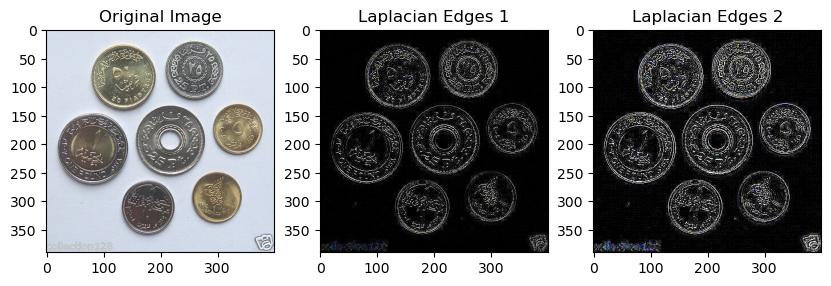

In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

image = cv2.imread('images/coins.jpg')

# --- تعريف أقنعة لابلاسيان لكشف الحواف ---
# لاحظ أن مجموع عناصر كل قناع يساوي صفر
mask1 = np.array([
    [0, -1, 0],
    [-1, 4, -1],
    [0, -1, 0]
])

mask2 = np.array([
    [-1, -1, -1],
    [-1, 8, -1],
    [-1, -1, -1]
])

# طبق الأقنعة
edge_image1 = cv2.filter2D(src=image, ddepth=-1, kernel=mask1)
edge_image2 = cv2.filter2D(src=image, ddepth=-1, kernel=mask2)

# --- كود العرض ---
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
edge_image1_rgb = cv2.cvtColor(edge_image1, cv2.COLOR_BGR2RGB)
edge_image2_rgb = cv2.cvtColor(edge_image2, cv2.COLOR_BGR2RGB)

fig, axs = plt.subplots(1, 3, figsize=(10, 4))
axs[0].imshow(image_rgb)
axs[0].set_title('Original Image')
axs[1].imshow(edge_image1_rgb)
axs[1].set_title('Laplacian Edges 1')
axs[2].imshow(edge_image2_rgb)
axs[2].set_title('Laplacian Edges 2')
plt.show()

###  كشف الحواف باستخدام سوبل (Edge Detection: Sobel)

In [1]:
import cv2

# اقرأ الصورة كصورة رمادية
image = cv2.imread('images/sunflower.jpg', 0)

# طبّق سوبل على محور X (للحواف العمودية)
sobelx = cv2.Sobel(image, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5)

# طبّق سوبل على محور Y (للحواف الأفقية)
sobely = cv2.Sobel(image, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5)

# يمكنك دمج النتيجتين
sobelxy = cv2.addWeighted(cv2.convertScaleAbs(sobelx), 0.5, cv2.convertScaleAbs(sobely), 0.5, 0)

cv2.namedWindow('Original Gray', cv2.WINDOW_NORMAL)
cv2.namedWindow('Sobel X', cv2.WINDOW_NORMAL)
cv2.namedWindow('Sobel Y', cv2.WINDOW_NORMAL)
cv2.namedWindow('Sobel X+Y', cv2.WINDOW_NORMAL)

# عرض النتائج
cv2.imshow('Original Gray', image)
cv2.imshow('Sobel X', sobelx)
cv2.imshow('Sobel Y', sobely)
cv2.imshow('Sobel X+Y', sobelxy)
cv2.waitKey(0)
cv2.destroyAllWindows()


error: OpenCV(4.12.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:1284: error: (-2:Unspecified error) The function is not implemented. Rebuild the library with Windows, GTK+ 2.x or Cocoa support. If you are on Ubuntu or Debian, install libgtk2.0-dev and pkg-config, then re-run cmake or configure script in function 'cvNamedWindow'


###  مقارنة بين لابلاسيان و كاني (Laplacian vs Canny)

In [3]:
import cv2

# اقرأ الصورة كصورة رمادية
image = cv2.imread('images/number.png', 0)

# يفضل دائمًا عمل تمويه بسيط قبل كشف الحواف لتقليل التشويش
img_blur = cv2.GaussianBlur(image, (3, 3), 0)

# طبّق فلتر لابلاسيان
laplacian = cv2.Laplacian(img_blur, ddepth=cv2.CV_64F)
laplacian_abs = cv2.convertScaleAbs(laplacian)

# طبّق خوارزمية كاني
# الأرقام 100 و 200 هي قيم العتبة (threshold)
canny = cv2.Canny(img_blur, threshold1=100, threshold2=200)

# === هنا التغيير: أنشئ النوافذ بشكل صريح قبل الحلقة ===
cv2.namedWindow('Original Image', cv2.WINDOW_NORMAL)
cv2.namedWindow('Laplacian', cv2.WINDOW_NORMAL)

# عرض النتائج للمقارنة
cv2.imshow('Original Image', image)
cv2.imshow('Laplacian', laplacian_abs)
cv2.imshow('Canny', canny)
cv2.waitKey(0)
cv2.destroyAllWindows()

## التكليف 

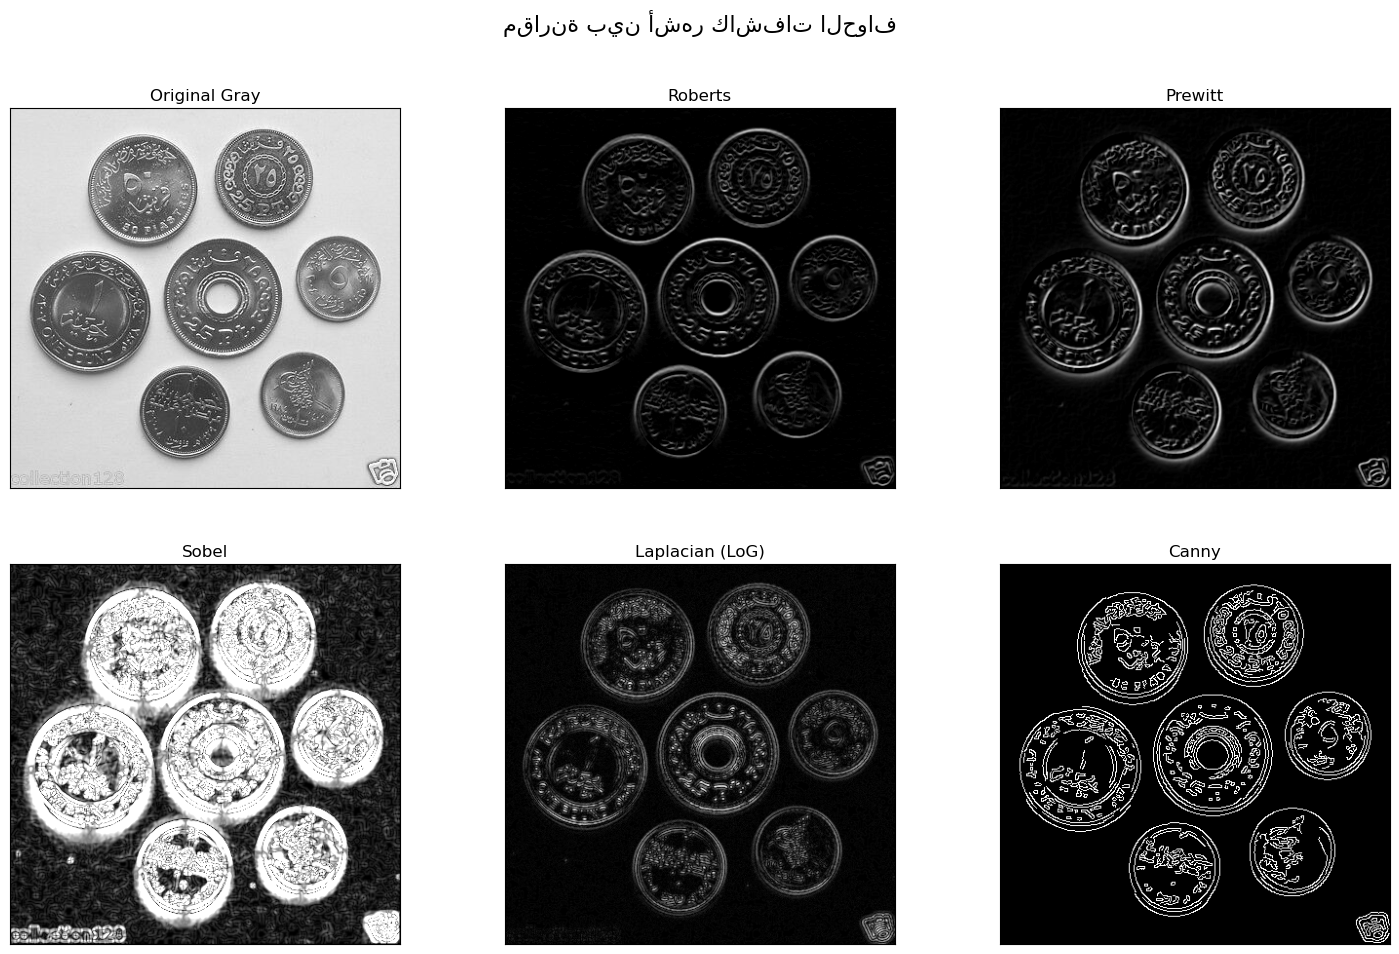

In [7]:
# -*- coding: utf-8 -*-
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- 1. تحميل وتجهيز الصورة ---
# استخدمنا صورة العملات لأن حوافها واضحة
image = cv2.imread('images/coins.jpg')
if image is None:
    print("لا يمكن العثور على الصورة، تأكد من المسار.")
else:
    # تحويل الصورة إلى رمادية لأن أغلب عمليات كشف الحواف تعمل عليها
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # تمويه بسيط لتقليل التشويش وتحسين النتائج
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # --- 2. تعريف الأقنعة (Kernels) وتطبيق الفلاتر ---

    # -- المشغل الأول: Roberts Cross --
    # بسيط وسريع، حساس للتشويش
    roberts_x = np.array([[1, 0], [0, -1]])
    roberts_y = np.array([[0, 1], [-1, 0]])
    roberts_x_img = cv2.filter2D(blurred_image, -1, roberts_x)
    roberts_y_img = cv2.filter2D(blurred_image, -1, roberts_y)
    roberts_img = cv2.addWeighted(roberts_x_img, 0.5, roberts_y_img, 0.5, 0)

    # -- المشغل الثاني: Prewitt --
    # شبيه بـ Sobel ولكنه أبسط حسابيًا
    prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
    prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])
    prewitt_x_img = cv2.filter2D(blurred_image, -1, prewitt_x)
    prewitt_y_img = cv2.filter2D(blurred_image, -1, prewitt_y)
    prewitt_img = cv2.addWeighted(prewitt_x_img, 0.5, prewitt_y_img, 0.5, 0)

    # -- المشغل الثالث: Sobel (من المختبر) --
    sobel_x = cv2.Sobel(blurred_image, cv2.CV_64F, 1, 0, ksize=5)
    sobel_y = cv2.Sobel(blurred_image, cv2.CV_64F, 0, 1, ksize=5)
    sobel_img = cv2.addWeighted(cv2.convertScaleAbs(sobel_x), 0.5, cv2.convertScaleAbs(sobel_y), 0.5, 0)

    # -- المشغل الرابع: Laplacian (من المختبر) --
    laplacian_img = cv2.Laplacian(blurred_image, cv2.CV_64F)
    laplacian_img = cv2.convertScaleAbs(laplacian_img)

    # -- المشغل الخامس: Laplacian of a Gaussian (LoG) --
    # هو ببساطة تطبيق لابلاسيان على صورة تم تنعيمها بفلتر جاوس (وهو ما فعلناه بالفعل)
    # لذلك، نتيجته هي نفسها نتيجة لابلاسيان السابقة
    log_img = laplacian_img

    # -- المشغل السادس: Canny (الأفضل للمقارنة) --
    canny_img = cv2.Canny(blurred_image, 50, 150)


    # --- 3. عرض جميع النتائج ---
    titles = ['Original Gray', 'Roberts', 'Prewitt', 'Sobel', 'Laplacian (LoG)', 'Canny']
    images = [gray_image, roberts_img, prewitt_img, sobel_img, log_img, canny_img]

    plt.figure(figsize=(15, 10))
    for i in range(6):
        plt.subplot(2, 3, i + 1)
        plt.imshow(images[i], cmap='gray')
        plt.title(titles[i])
        plt.xticks([])
        plt.yticks([])
    
    plt.suptitle("مقارنة بين أشهر كاشفات الحواف", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.subplots_adjust(hspace=0.2)
    plt.show()